In [40]:
from sklearn.datasets import load_boston

***Predicting Boston house price using lasso and ridge regression ***

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
df =load_boston()

In [43]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

now make it a dataframe

In [44]:
dt=pd.DataFrame(df.data)

In [45]:
dt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**our feature name is missing so we will do another operation to get our data straight**


In [46]:
dt.columns=df.feature_names

In [47]:
dt.head()  #EUREKA FOR ME

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Ek aur musibat hai yahan price nai dikh raha jo hamara dependent feature hai is data frame to add karna padega

In [48]:
dt['kimat']=df.target

In [49]:
dt.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,kimat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
x=dt.iloc[:,:-1]  #independent feature
y=dt.iloc[:,-1]   #Dependent Feature

*ab linear regression try karte hai*

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
mse=cross_val_score(lin_reg,x,y,scoring='neg_mean_squared_error',cv=20) #Cv is the number of cross validation we are doing here
mean_mse=np.mean(mse)  #taking mean of all those values
print(mse)
print(mean_mse)

[ -12.54422071   -5.64964543  -11.42717864  -14.4334311    -5.63305129
  -19.60190761  -39.14285223  -32.29017532  -30.19147019  -24.63218987
  -24.01293354  -16.4792487    -8.52405256  -10.60778423 -271.78534921
  -34.19853346  -39.76138158  -15.21357404   -6.09498271  -15.50481802]
-31.88643902194484


**apna score aa gaya jo ki -31 hai ab apun laso try karenge and uske liye lambda ka value jananna padega so that is 
called finding hyperparameters**

*****Ridge Regression*****

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV    #this will help in find the values of lambda
rid=Ridge()
hyparameters={'alpha':[1e-15,1,2,3,25,.09,55,99,700,56,79,100]}
ridge_reg=GridSearchCV(rid,hyparameters,scoring='neg_mean_squared_error',cv=20)


In [55]:
ridge_reg.fit(x,y)

C:\fffff\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1, 2, 3, 25, 0.09, 55, 99, 700, 56, 79, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [56]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 100}
-29.449644295032456


**LASSO**

In [61]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV    #this will help in find the values of lambda
las=Lasso()
hyparameter={'alpha':[1e-15,1,2,3,25,.09,55,99,700,56,79,100]}
laso_reg=GridSearchCV(las,hyparameter,scoring='neg_mean_squared_error',cv=20)
laso_reg.fit(x,y)


C:\fffff\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\fffff\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\fffff\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\fffff\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha 

GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1, 2, 3, 25, 0.09, 55, 99, 700, 56, 79, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [62]:
print(laso_reg.best_params_)
print(laso_reg.best_score_)

{'alpha': 1e-15}
-31.64527459635958


In [63]:
#ab thora test data pe bhi ho jaye 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.29,random_state=0)

In [65]:
rid_pred=ridge_reg.predict(x_test)
las_pred=laso_reg.predict(x_test)

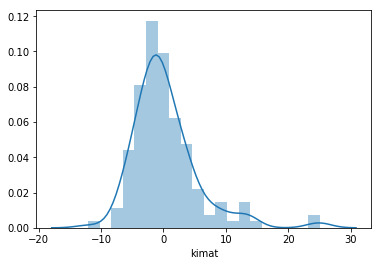

In [67]:
import seaborn as sns
sns.distplot(y_test-rid_pred)

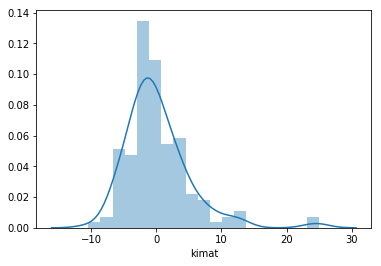

In [68]:
sns.distplot(y_test-las_pred)

**isme Ridge equation ne op kaam kiya hai**